# ML with sklearn
Naomi Zilber


### Load in data

Read in the data using pandas

In [55]:
import pandas as pd
import io
import numpy as np
import seaborn as sb
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from matplotlib import pyplot as plt
from sklearn import preprocessing
from sklearn.neural_network import MLPClassifier

In [56]:
from google.colab import files
uploaded = files.upload()

Saving Auto.csv to Auto.csv


In [57]:
# read in the data
df = pd.read_csv(io.BytesIO(uploaded['Auto.csv']))

# output the first 5 rows of the data and the dimensions of the data
print(df[0:5])
print("\nDataframe dimensions =", df.shape)

    mpg  cylinders  displacement  horsepower  weight  acceleration  year  \
0  18.0          8         307.0         130    3504          12.0  70.0   
1  15.0          8         350.0         165    3693          11.5  70.0   
2  18.0          8         318.0         150    3436          11.0  70.0   
3  16.0          8         304.0         150    3433          12.0  70.0   
4  17.0          8         302.0         140    3449           NaN  70.0   

   origin                       name  
0       1  chevrolet chevelle malibu  
1       1          buick skylark 320  
2       1         plymouth satellite  
3       1              amc rebel sst  
4       1                ford torino  

Dataframe dimensions = (392, 9)


### Data Exploration

Based on the results from describe(), I found the averages and ranges of these columns. The averages of mpg, weight, and year are 23.45, 2977.58, and 76.01, respectively. The ranges of mpg, weight, and year are 37.6, 3527, and 12, respectively.

In [58]:
print(df[['mpg', 'weight', 'year']].describe())

              mpg       weight        year
count  392.000000   392.000000  390.000000
mean    23.445918  2977.584184   76.010256
std      7.805007   849.402560    3.668093
min      9.000000  1613.000000   70.000000
25%     17.000000  2225.250000   73.000000
50%     22.750000  2803.500000   76.000000
75%     29.000000  3614.750000   79.000000
max     46.600000  5140.000000   82.000000


### Explore Data Types

It looks like most of the data are either a float or integer, and the 'name' feature is an object

In [59]:
# check data types
df.dtypes

mpg             float64
cylinders         int64
displacement    float64
horsepower        int64
weight            int64
acceleration    float64
year            float64
origin            int64
name             object
dtype: object

In [60]:
# convert the cylinders column to categorical using cat.codes
df.cylinders = df.cylinders.astype('category').cat.codes

# convert the origin column to categorical without cat.codes
df.origin = df.origin.astype('category')

# verify results
df.dtypes

mpg              float64
cylinders           int8
displacement     float64
horsepower         int64
weight             int64
acceleration     float64
year             float64
origin          category
name              object
dtype: object

### Handle NAs

There are a few NAs in this data set so I get rid of those.

In [61]:
# check for NAs
df.isnull().sum()

mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    1
year            2
origin          0
name            0
dtype: int64

In [62]:
# remove the NAs and output the new dimensions
df = df.dropna()
print('\nDataframe dimensions =', df.shape)


Dataframe dimensions = (389, 9)


### Modify Columns

In [63]:
# find the mean of mpg
mpg_mean = np.mean(df.mpg)

# create a new column named 'mpg_high' and make it categorical
df['mpg_high'] = np.where(df.mpg > mpg_mean, 1, 0)
df.mpg_high = df.mpg_high.astype('category')

# delete the 'mpg' and 'name' columns
df = df.drop(columns=['mpg', 'name'])

# see changes
print(df[0:5])

   cylinders  displacement  horsepower  weight  acceleration  year origin  \
0          4         307.0         130    3504          12.0  70.0      1   
1          4         350.0         165    3693          11.5  70.0      1   
2          4         318.0         150    3436          11.0  70.0      1   
3          4         304.0         150    3433          12.0  70.0      1   
6          4         454.0         220    4354           9.0  70.0      1   

  mpg_high  
0        0  
1        0  
2        0  
3        0  
6        0  


<ipython-input-63-1b5697ac1b6a>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['mpg_high'] = np.where(df.mpg > mpg_mean, 1, 0)
<ipython-input-63-1b5697ac1b6a>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.mpg_high = df.mpg_high.astype('category')


### Data Exploration with Graphs

Create a few graphs to get an idea of the data distribution.

The graph below shows that there is a fairly even number of 0s and 1s in mpg_high.

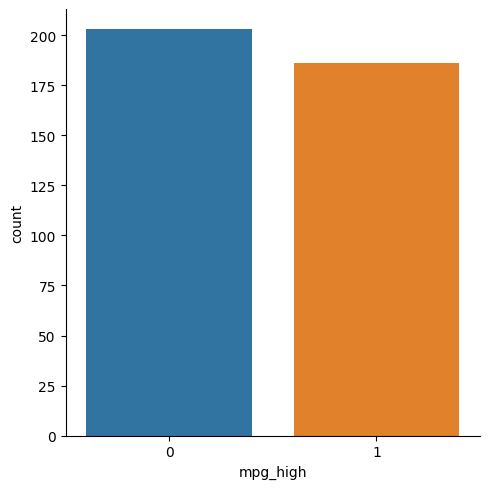

In [64]:
# seaborn catplot on the mpg_high column
sb.catplot(x='mpg_high', kind='count', data=df)

The graph below shows that horsepower and weight are linearly and positively related, with mpg_high being 0 at high horsepower and weight values, and mpg_high being 1 at lower horsepower and weight values. 

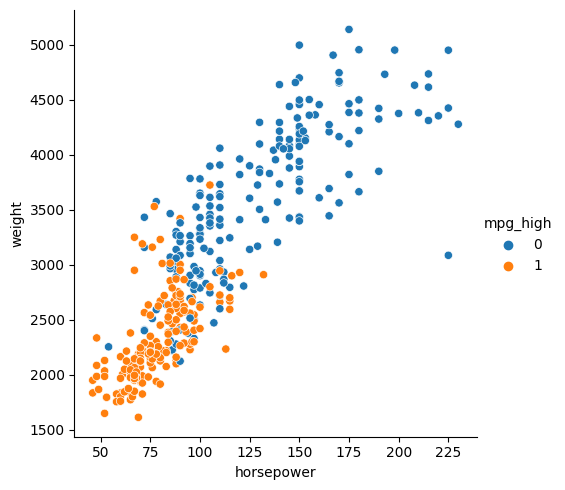

In [65]:
# seaborn relplot with horsepower on the x axis, weight on the y axis, setting hue to mpg_high
sb.relplot(x='horsepower', y='weight', hue='mpg_high', data=df)

The graph below shows that for mpg_high 0 the weight is higher while when mpg_high is 1 the weight is lower.

<Axes: xlabel='mpg_high', ylabel='weight'>

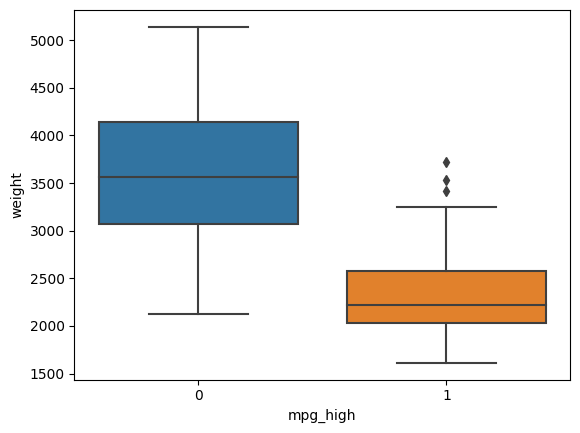

In [66]:
# seaborn boxplot with mpg_high on the x axis and weight on the y axis
sb.boxplot(x='mpg_high', y='weight', data=df)

### Train and Test Split
Split data into 80% train and 20% test

In [67]:
# separate columns into predictors and target
x = df.iloc[:, 0:7]
y = df.iloc[:, 7]

# train/test split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1234)

# print the dimensions of the train and test data
print('train size =', x_train.shape)
print('test size =', x_test.shape)

train size = (311, 7)
test size = (78, 7)


### Logistic Regression
Make a logistic regression model. On the training data the accuracy is 0.91.

In [68]:
# make the logistic regression model
logreg = LogisticRegression(solver='lbfgs', max_iter=500)
logreg.fit(x_train, y_train)
logreg.score(x_train, y_train)

0.9067524115755627

Make predictions and a classification report. From the classification report, the accuracy is 0.86, precision is 0.73, recall is 0.96, and f1-score is 0.83.

In [69]:
# make predictions
pred = logreg.predict(x_test)

# evaluation
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.98      0.80      0.88        50
           1       0.73      0.96      0.83        28

    accuracy                           0.86        78
   macro avg       0.85      0.88      0.85        78
weighted avg       0.89      0.86      0.86        78



In [70]:
# confusion matrix
confusion_matrix(y_test, pred)

array([[40, 10],
       [ 1, 27]])

### Decision Tree
Make a decision tree.

In [71]:
# make decision tree model
dt = DecisionTreeClassifier(random_state=1234)
dt.fit(x_train, y_train)

DecisionTreeClassifier(random_state=1234)

Make predictions and a classification report. The classification report shows that the accuracy is 0.92, precision is 0.87, recall is 0.93, and f1-score is 0.90.

In [72]:
# make predictions
pred2 = dt.predict(x_test)

# evaluation
print(classification_report(y_test, pred2))

              precision    recall  f1-score   support

           0       0.96      0.92      0.94        50
           1       0.87      0.93      0.90        28

    accuracy                           0.92        78
   macro avg       0.91      0.92      0.92        78
weighted avg       0.93      0.92      0.92        78



In [73]:
# confusion matrix
confusion_matrix(y_test, pred2)

array([[46,  4],
       [ 2, 26]])

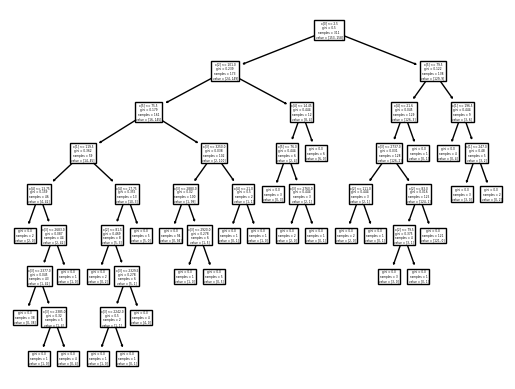

In [74]:
# plot the tree
tree.plot_tree(dt)
plt.show()

### Neural Networks
Make a neural network model

First, scale the training data

In [75]:
# normalize the data
scaler = preprocessing.StandardScaler().fit(x_train)

x_train_scaled = scaler.transform(x_train)
x_test_scaled = scaler.transform(x_test)

There are 7 predictors, so I tried a few hidden layer sizes based on the rules of thumbs.

In [76]:
# train
neural = MLPClassifier(solver='lbfgs', hidden_layer_sizes=(5,3), max_iter=600, random_state=1234)
neural.fit(x_train_scaled, y_train)

MLPClassifier(hidden_layer_sizes=(5, 3), max_iter=600, random_state=1234,
              solver='lbfgs')

For hidden_layers_sizes (5,3) - accuracy is 0.90, precision is 0.81, recall is 0.93, and f1-score is 0.87.

For hidden_layers_sizes (9,5) - accuracy is 0.87, precision is 0.78, recall is 0.89, and f1-score is 0.83.

For hidden_layers_sizes (6,) - accuracy is 0.90, precision is 0.83, recall is 0.89, and f1-score is 0.86.

Based on these results, I decided to choose the (5,3) setting even though (6,) also did very well.

In [77]:
# make predictions
pred3 = neural.predict(x_test_scaled)

# evaluation
print(classification_report(y_test, pred3))

              precision    recall  f1-score   support

           0       0.96      0.88      0.92        50
           1       0.81      0.93      0.87        28

    accuracy                           0.90        78
   macro avg       0.88      0.90      0.89        78
weighted avg       0.90      0.90      0.90        78



In [78]:
# confusion matrix
confusion_matrix(y_test, pred3)

array([[44,  6],
       [ 2, 26]])

Make a second neural networks model.

In [79]:
# train
neural2 = MLPClassifier(solver='sgd', hidden_layer_sizes=(6,), max_iter=1000, random_state=1234)
neural2.fit(x_train_scaled, y_train)

MLPClassifier(hidden_layer_sizes=(6,), max_iter=1000, random_state=1234,
              solver='sgd')

For hidden_layers_sizes (6,) - accuracy is 0.90, precision is 0.78, recall is 1.00, and f1-score is 0.88.

For hidden_layers_sizes (5,3) - accuracy is 0.90, precision is 0.79, recall is 0.96, and f1-score is 0.87.

For hidden_layers_sizes (9,5) - accuracy is 0.88, precision is 0.77, recall is 0.96, and f1-score is 0.87.

Based on these results, I decided to choose the (6,) since it had the best overall results.

In [80]:
# make predictions
pred4 = neural2.predict(x_test_scaled)

# evaluation
print(classification_report(y_test, pred4))

              precision    recall  f1-score   support

           0       1.00      0.84      0.91        50
           1       0.78      1.00      0.88        28

    accuracy                           0.90        78
   macro avg       0.89      0.92      0.89        78
weighted avg       0.92      0.90      0.90        78



In [81]:
# confusion matrix
confusion_matrix(y_test, pred4)

array([[42,  8],
       [ 0, 28]])

When comparing the two models, I see that both models had the same accuracy, but the first model had higher precision and lower recall and f1-score than the second model. This means that both models did really well and didn't really outperform each other.

I think the performance was the same because the data set used is relatively small and because different hidden layer sizes were tried before finding the most optimal result.

### Analysis

The results are the following:

*   Logistic regression accuracy is 0.86, precision is 0.73, recall is 0.96, and f1-score is 0.83.
*   Decision tree accuracy is 0.92, precision is 0.87, recall is 0.93, and f1-score is 0.90.
*   First neural network model accuracy is 0.90, precision is 0.81, recall is 0.93, and f1-score is 0.87.
*   Second neural network model accuracy is 0.90, precision is 0.78, recall is 1.00, and f1-score is 0.88.

Based on these results, I see that the decision tree model performed the best out of all the models since it had the highest accuracy. The decision tree model had the highest accuracy, precision, f1-score, and second highest recall. Overall, it had the best results for all of the evaluation metrics.

The logistic regression model did the worse, with the lowest accuracy, precision, and f1-score values. Only its recall was the highest out of all the other models. Both neural networks models had the same accuracies, and very close precision, recall, and f1-score values. Compared to the other models, these performed the second best after the decision tree model.

The decision tree model probably outperformed the other models because neural networks models usually perform better on large data sets but our data set was relatively small, the logistic regression was probably unable to capture the non-linear relationships between the predictors and target which resulted in lower performance, while decision trees perform better when there is a non-linear relationship between the predictors and target.

When comparing my experiences with R vs sklearn, I found that I didn't have any particular preference of one over the other. However, I think that overall, using R was simpler and easier to use especially when it comes to splitting data into train/test and making the models, but when it comes to data exploration using graphs, sklearn was very straightforward and easy to use.
